In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import joblib

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [ ]:
import pandas as pd
import requests

# URL to the CSV file
url = "https://github.com/lavibula/GoldPricePrediction/raw/main/data/data_preparation/data_preparation.csv"

# Download the file
response = requests.get(url)
with open('data_preparation.csv', 'wb') as file:
    file.write(response.content)

# Read the CSV file
df = pd.read_csv('data_preparation.csv')

# Display the first few rows of the dataframe
print(df.head())

         Date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  crude_oil  \
0  2023-11-03     1993.5     2011.9    1989.3      1999.2  3.6815      80.51   
1  2023-11-02     1992.0     1999.2    1986.3      1993.5  3.6725      82.46   
2  2023-11-01     1993.3     2005.9    1978.2      1987.5  3.6490      80.44   
3  2023-10-31     2005.6     2017.7    1987.4      1994.3  3.6490      81.02   
4  2023-10-30     2013.5     2016.8    1999.7      2005.6  3.6585      82.31   

      DXY  EURUSD    MSCI    NASDAQ    NLR  platinum      RUT  silver  \
0  105.02  1.0732  497.76  13478.28  71.36     944.3  1760.71  23.285   
1  106.12  1.0622  487.02  13294.19  72.14     930.6  1714.21  22.846   
2  106.88  1.0570  471.85  13061.47  70.98     930.4  1669.70  22.790   
3  106.66  1.0578  471.55  12851.24  69.93     944.9  1662.28  22.952   
4  106.12  1.0617  481.99  12789.48  68.35     939.9  1647.29  23.396   

     SP500    VIX  
0  4358.34  14.91  
1  4317.78  15.66  
2  4237.86  16.87  


In [ ]:

df=df[::-1]
df=df.reset_index(drop=True)
df

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47
1,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
2,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
4,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75
3419,2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
3420,2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87
3421,2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66


In [ ]:
X_df = df[:-1]
y_df = df["GOLD_close"][1:]

In [ ]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)
X_train_df[0:10]

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47
1,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
2,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
4,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
5,2010-04-09,1151.8,1165.8,1150.4,1161.9,3.5900,84.92,81.09,1.3501,36.62,2454.05,70.02,1727.4,702.95,18.351,1194.37,16.14
6,2010-04-12,1161.9,1170.7,1154.8,1162.2,3.5645,84.34,80.56,1.3594,37.10,2457.87,70.20,1739.4,705.06,18.414,1196.48,15.58
7,2010-04-13,1156.2,1158.1,1145.4,1153.4,3.6005,84.05,80.51,1.3616,37.02,2465.99,69.33,1717.3,707.03,18.249,1197.30,16.20
8,2010-04-14,1152.0,1162.8,1151.0,1159.6,3.6105,85.84,80.19,1.3653,37.11,2504.86,69.69,1734.2,722.40,18.415,1210.65,15.59
9,2010-04-15,1155.8,1162.3,1150.7,1160.3,3.6005,85.51,80.48,1.3575,37.96,2515.69,69.18,1726.3,724.21,18.433,1211.67,15.89


In [ ]:
X_train_df.shape,X_test_df.shape

((2908, 17), (514, 17))

In [ ]:
from itertools import product
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Define hyperparameter values
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01,0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.5, 1]
base_estimator_values = [
    DecisionTreeRegressor(max_depth=15, min_samples_split=split, min_samples_leaf=leaf)
    for split in [2,3,4 ,5, 10]
    for leaf in [1, 2,3,4,5]
] + [
    DecisionTreeRegressor(max_depth=10, min_samples_split=split, min_samples_leaf=leaf)
    for split in [2, 3,4,5, 10]
    for leaf in [1, 2,3, 4,5]
]

score = 0

# Generate combinations of hyperparameters
combinations = product(n_estimators_values, learning_rate_values, base_estimator_values)
best_parameters={}
for n_estimators, learning_rate, base_estimator in combinations:
    model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, base_estimator=base_estimator,random_state=27)
    model.fit(X_train_df.drop('Date', axis=1), y_train_df)

    y_test_pred = model.predict(X_test_df.drop('Date', axis=1)).reshape(-1, 1)
    y_test_pred = y_test_pred.ravel()

    current_score = r2_score(y_test_df, y_test_pred)
    parameters = {
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'base_estimator':base_estimator
        }
    print("score: {:.2f}".format(current_score))
    print("parameters: {}".format(parameters))
    if current_score > score:
        score = current_score
        best_parameters = {
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'base_estimator':base_estimator
        }
        print("Best score: {:.2f}".format(score))
        print("Best parameters: {}".format(best_parameters))
    else:
        print("Best score: {:.2f}".format(score))
        print("Best parameters: {}".format(best_parameters))

score: 0.91
parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15)}
Best score: 0.91
Best parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15)}
score: 0.92
parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)}
Best score: 0.92
Best parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)}
score: 0.93
parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15, min_samples_leaf=3)}
Best score: 0.93
Best parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15, min_samples_leaf=3)}
score: 0.93
parameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeRegressor(max_depth=15, min_samples_leaf=4)}
Best scor

KeyboardInterrupt: ignored

In [ ]:
model=AdaBoostRegressor( n_estimators=50, learning_rate=0.01,loss='linear', base_estimator=DecisionTreeRegressor(max_depth=15, min_samples_leaf=5),random_state=27)

In [ ]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)

In [ ]:
model.fit(X_train_df.drop('Date', axis=1), y_train_df)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       min_samples_leaf=5),
                  learning_rate=0.01, random_state=27)

In [ ]:
y_train_pred = model.predict(X_train_df.drop('Date', axis=1))
y_train_pred[:20]

array([1135.425     , 1140.525     , 1145.65714286, 1155.18      ,
       1158.27777778, 1161.1       , 1161.98333333, 1156.26      ,
       1158.4       , 1150.55555556, 1140.6       , 1140.18333333,
       1149.8       , 1150.01428571, 1152.5875    , 1154.91111111,
       1160.12      , 1165.31111111, 1172.26      , 1174.74285714])

In [ ]:
y_train_df = y_train_df.ravel()
y_train_pred = y_train_pred.ravel()

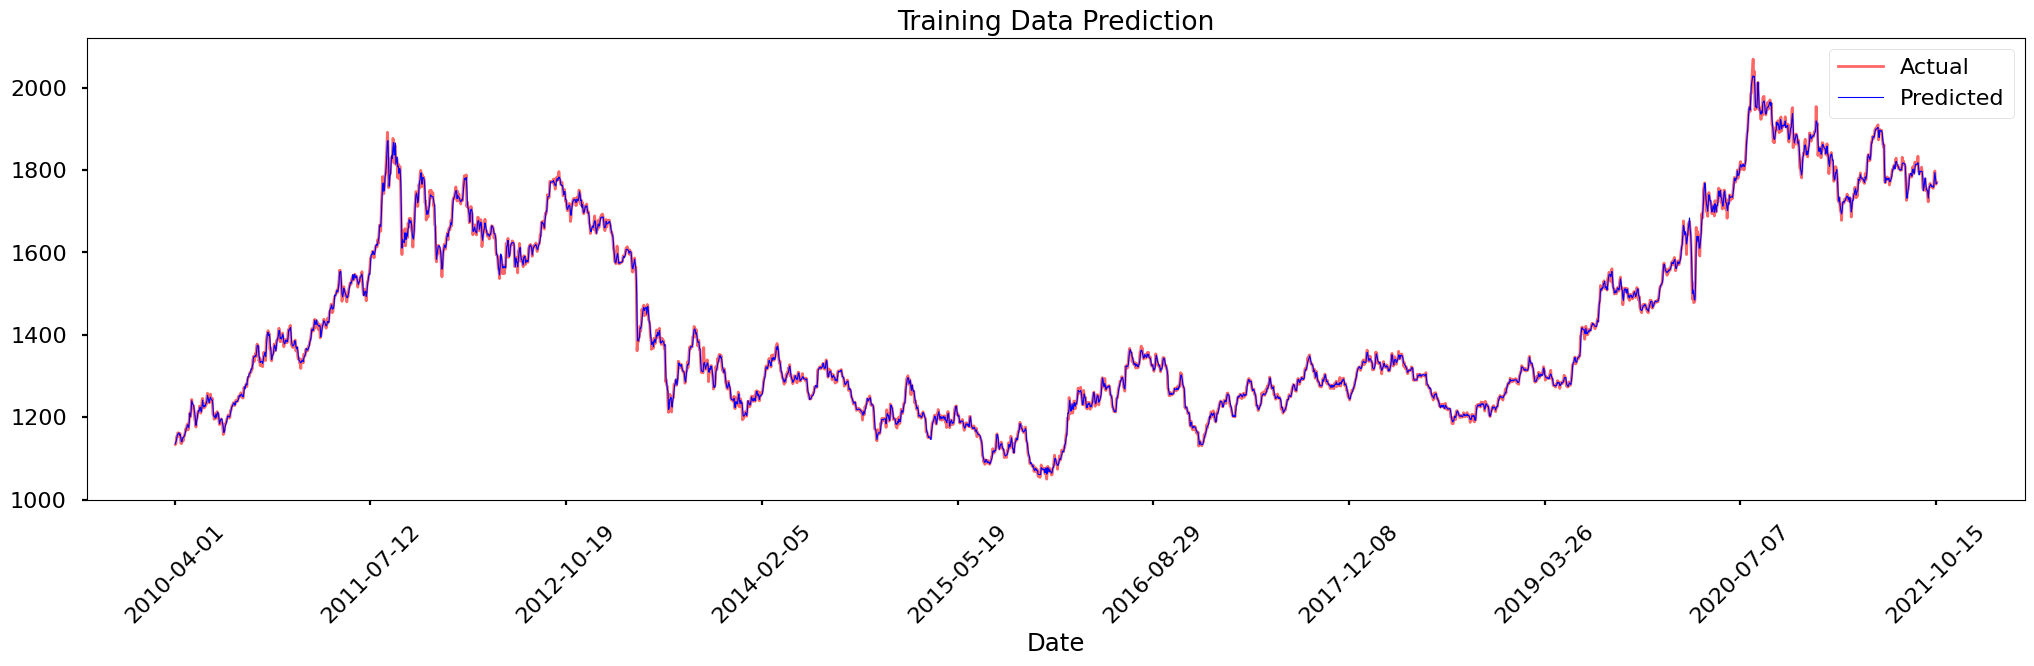

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of visible x-axis tick labels
num_ticks = 10  # Adjust the number of ticks as needed

plt.figure(figsize=(25, 6))
plt.plot(df.Date[0:len(y_train_df)], y_train_df, color='red', linewidth=2.0, alpha=0.6)
plt.plot(df.Date[0:len(y_train_df)], y_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.title("Training Data Prediction")

# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[1:len(y_train_df)])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[x_ticks], rotation=45)  # Adjust rotation angle as needed

plt.show()


In [ ]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1))
y_test_pred[0:10]

array([1769.57142857, 1781.54444444, 1785.21428571, 1787.36666667,
       1784.25      , 1788.025     , 1787.36666667, 1788.77777778,
       1785.21428571, 1782.35      ])

In [ ]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [ ]:
len(y_test_df)

514

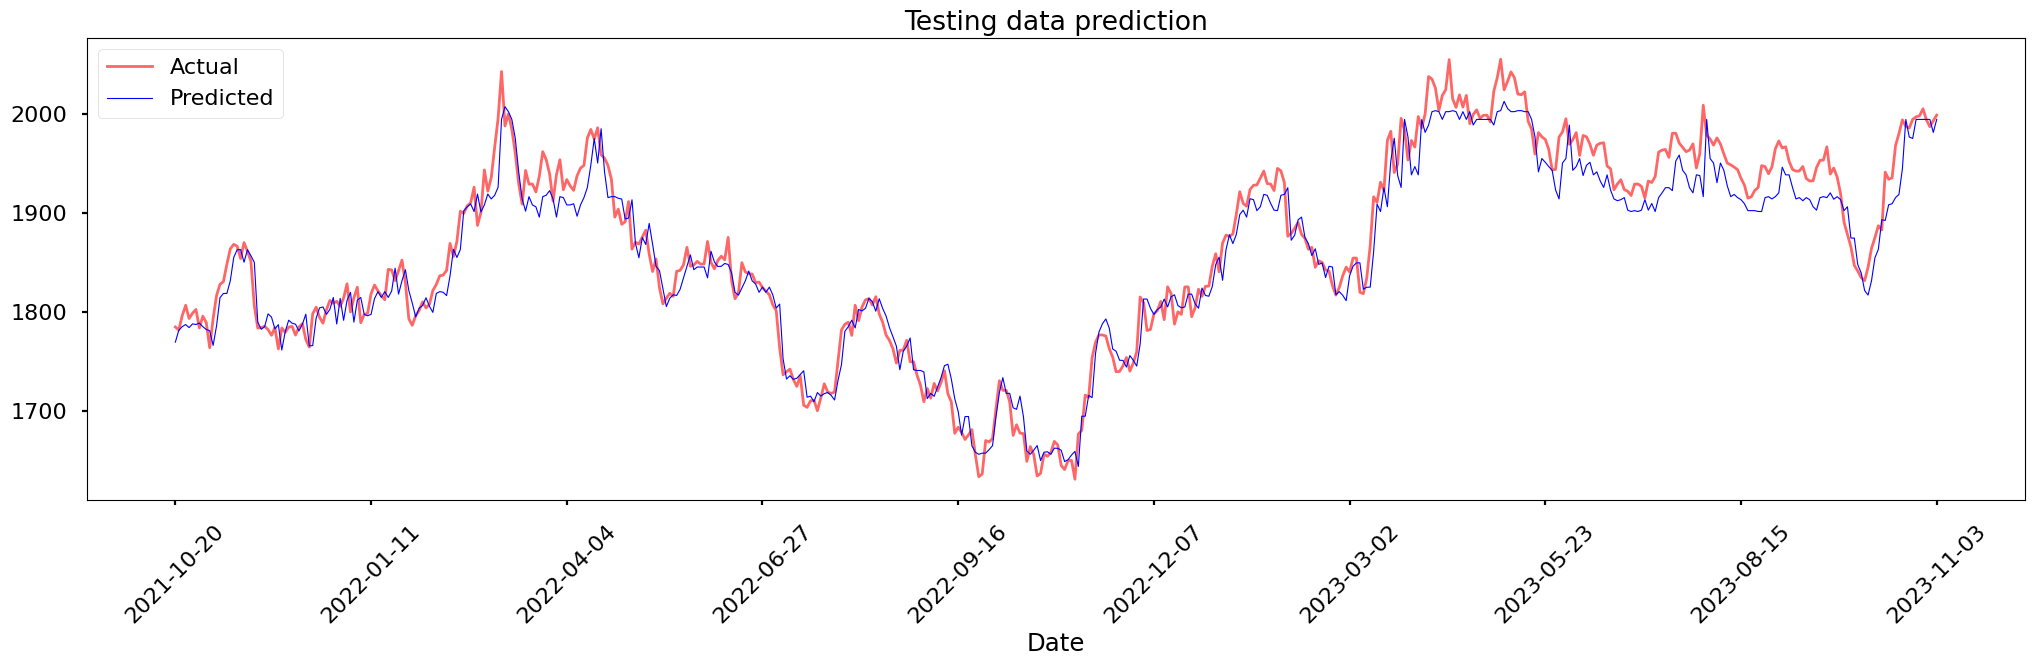

In [ ]:
num_ticks = 10  # Adjust the number of ticks as needed
plt.figure(figsize=(25,6))
plt.plot(df.Date[len(y_train_df)+1:], y_test_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df.Date[len(y_train_df)+1:], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[len(y_train_df)+1:])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[len(y_train_df)+1+x_ticks], rotation=45)  # Adjust rotation angle as needed
plt.show()

In [ ]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_df,y_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_df,y_train_pred))
print("R2 score:", r2_score(y_train_df,y_train_pred))
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df,y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df,y_test_pred))
print("R2 score:", r2_score(y_test_df,y_test_pred))


Test accuracy for train set
Root Mean Square Error (RMSE): 7.610507411781087
 Mean Absolute Percentage Error (MAPE): 0.0033047302470771795
R2 score: 0.9989109439448137
Test accuracy for test set
Root Mean Square Error (RMSE): 23.022400354198282
 Mean Absolute Percentage Error (MAPE): 0.009565533494169071
R2 score: 0.9468012275405745


In [ ]:
import joblib
joblib.dump(model, "model")

['model']

In [ ]:
adaboost = joblib.load("model")

In [ ]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1)[:-1])
y_test_pred

array([1769.57142857, 1781.54444444, 1785.21428571, 1787.36666667,
       1784.25      , 1788.025     , 1787.36666667, 1788.77777778,
       1785.21428571, 1782.35      , 1781.1       , 1766.26      ,
       1786.08571429, 1814.51111111, 1818.81666667, 1818.81666667,
       1831.58      , 1855.2       , 1863.03333333, 1863.0875    ,
       1850.4       , 1863.03333333, 1857.        , 1850.26      ,
       1789.78      , 1782.56      , 1785.21428571, 1798.13333333,
       1794.86666667, 1782.95      , 1787.26      , 1761.56666667,
       1780.18      , 1791.71666667, 1788.72      , 1787.66666667,
       1780.86      , 1787.6875    , 1797.8375    , 1765.75      ,
       1766.06666667, 1793.76666667, 1804.24      , 1805.13333333,
       1797.625     , 1802.7       , 1814.7       , 1787.92      ,
       1813.82      , 1791.62      , 1811.725     , 1819.96666667,
       1789.78      , 1812.05555556, 1814.76666667, 1797.625     ,
       1796.24      , 1797.625     , 1813.54      , 1820.64285